In [ ]:
#### DESCRIPTION
## code to annotate cell types from the 3D dataset provided by Wang et al, 2018, Science

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

temp = np.load('/Users/work/Documents/GitHub/mlgenomics/datasets/sequentially_encoded_spatial_wang_science_2018.npz')
gene_names = pd.read_csv('/Users/work/Documents/GitHub/mlgenomics/data_as_downloaded/sequentially_encoded_Wang_et_al_2018/gene_names.csv')

<IPython.core.display.Javascript object>


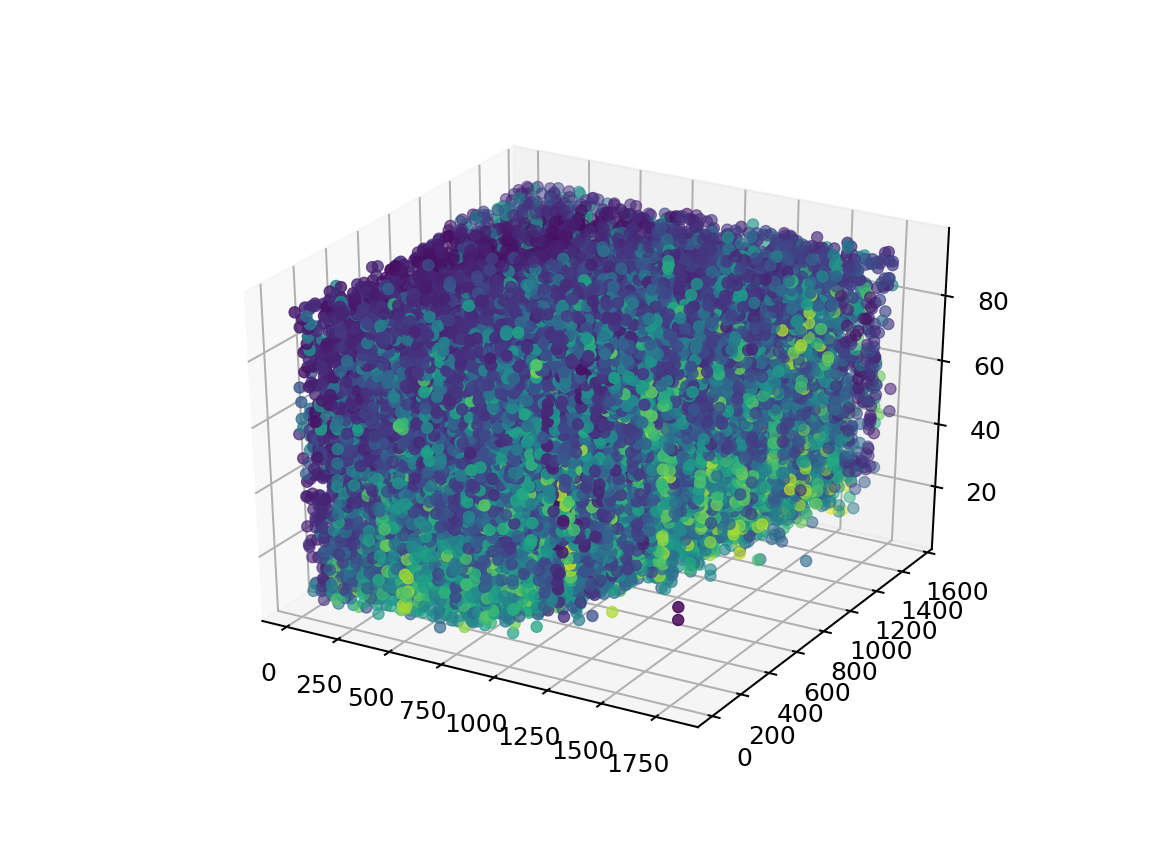

In [15]:
%matplotlib notebook
ax = plt.axes(projection='3d')
ax.scatter(coord[28], coord[29], coord[30], c = exp['Gad1'],cmap='viridis', linewidth=0.5)


<IPython.core.display.Javascript object>


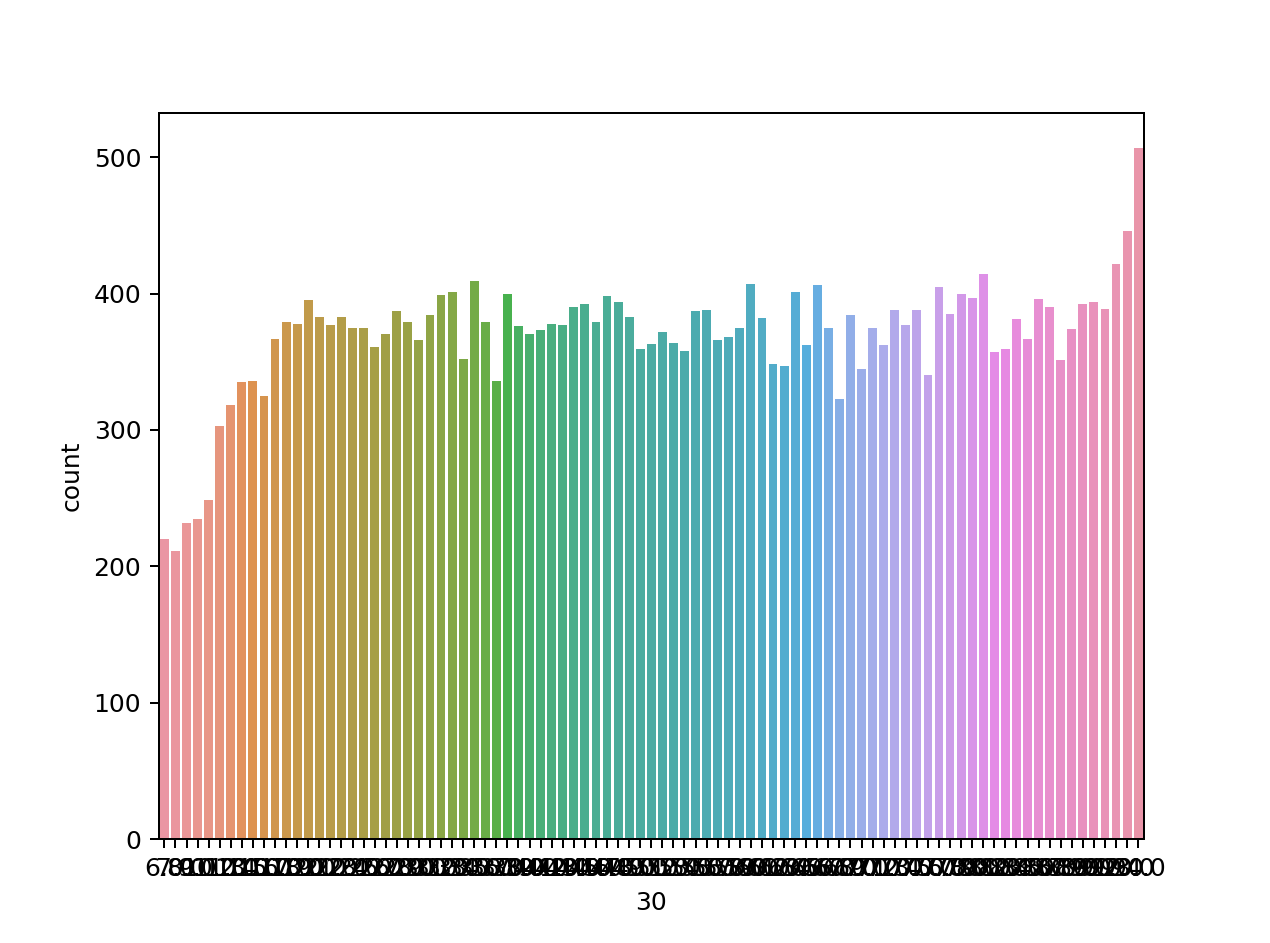

In [11]:
import seaborn as sns
plt.figure()
sns.countplot(data = coord, x = 30)

<IPython.core.display.Javascript object>


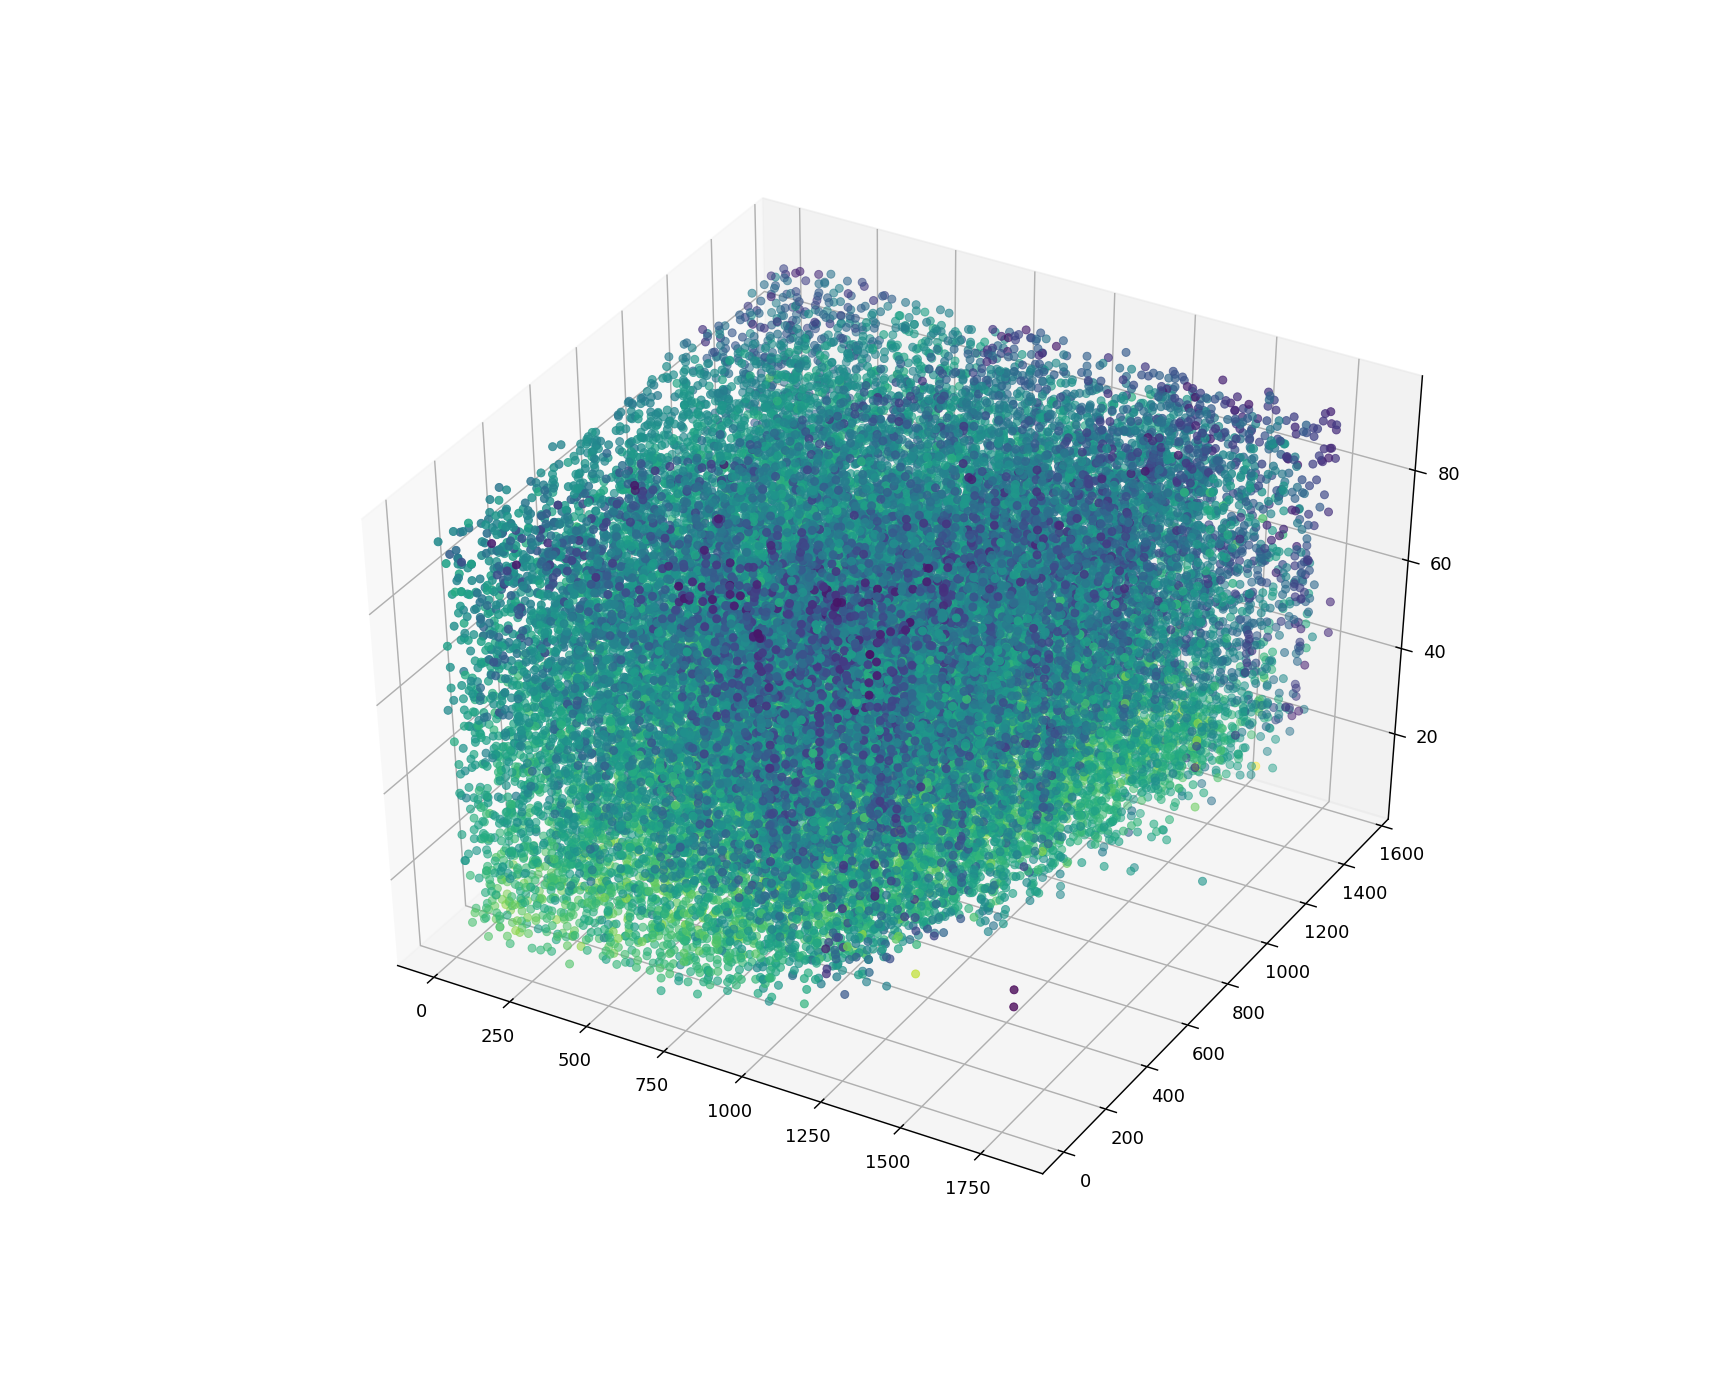

In [20]:
%matplotlib notebook
ax = plt.axes(projection='3d')
ax.scatter(coord[28], coord[29], coord[30], c = exp['Mbp'],cmap='viridis', linewidth=0.5)


In [7]:
ax.scatter(coord[28], coord[29], coord[30], cmap='viridis', linewidth=0.5)


In [3]:
df = pd.DataFrame(temp['arr_0'])
exp = df.loc[:,0:27]
exp.columns = gene_names['gene']
coord = df.loc[:,28:30]

(array([  2.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   1.,   2.,   0.,
          1.,   2.,   3.,   0.,   2.,   8.,  11.,  13.,  11.,  14.,  27.,
         29.,  42.,  42.,  48.,  55.,  46.,  70.,  48.,  70.,  63.,  76.,
         66.,  95.,  72.,  90., 100., 104.,  89.,  90.,  95., 109., 115.,
        147., 138., 164., 154., 167., 184., 195., 258., 238., 272., 291.,
        303., 351., 331., 387., 403., 401., 454., 472., 463., 471., 488.,
        465., 525., 467., 523., 461., 518., 538., 488., 538., 561., 525.,
        523., 493., 513., 529., 478., 493., 490., 482., 488., 472., 408.,
        426., 476., 427., 417., 402., 418., 415., 348., 384., 364., 356.,
        369., 357., 325., 371., 333., 320., 359., 327., 325., 291., 295.,
        297., 283., 262., 284., 270., 250., 268., 225., 238., 217., 199.,
        208., 203., 186., 137., 151., 166., 144., 126.,  99., 119.,  99.,
         86.,  68.,  77.,  64.,  61.,  62.,  58.,  54.,  37.,  49.,  28.,
         29.,  26.,  31.,  28.,  17., 

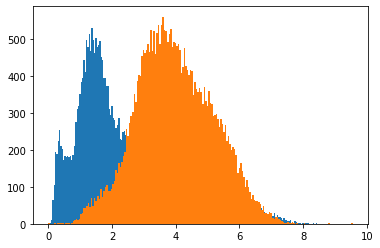

In [48]:
# assign cell types based on marker genes (assing Ast, Neuron, other)
#neuronal markers
#gad1

#astrocyte markers
#Gja1

plt.hist(exp['Gad1'], bins = 200)

plt.hist(exp['Gja1'], bins = 200)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(exp)
principalDf = pd.DataFrame(data = principalComponents)
sum(pca.explained_variance_ratio_)

0.8831665719007924

In [4]:
# cluster based on the top components
>>> from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0).fit(principalDf)

In [5]:
kmeans.labels_

array([7, 1, 7, ..., 2, 2, 7], dtype=int32)

In [6]:
# average all genes according to these labels, then plot all the genes 
df = pd.concat([exp,pd.DataFrame(kmeans.labels_)], axis = 1)
ff = df.groupby(0).mean()

In [7]:
m = ff.mean(axis=0)
sd = ff.std(axis=0)
temp2 = ff.sub(m, axis=1) 
temp3 = temp2.div(sd, axis=1)


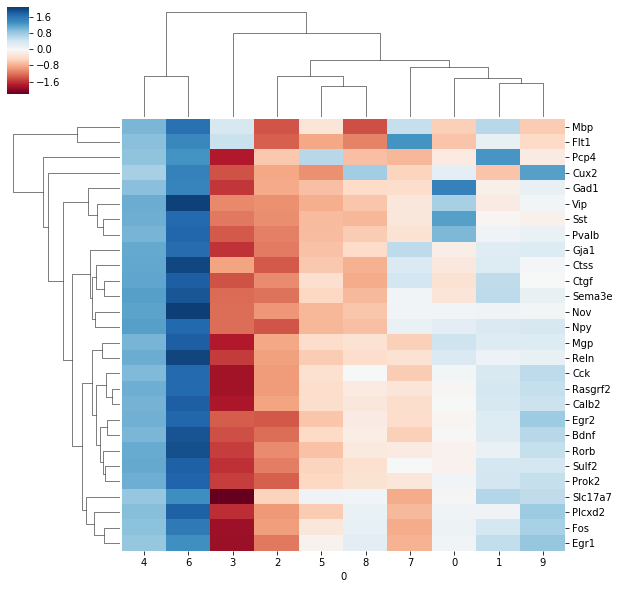

In [8]:
import seaborn as sns

sns.clustermap(temp3.transpose(), cmap="RdBu", center = 0)

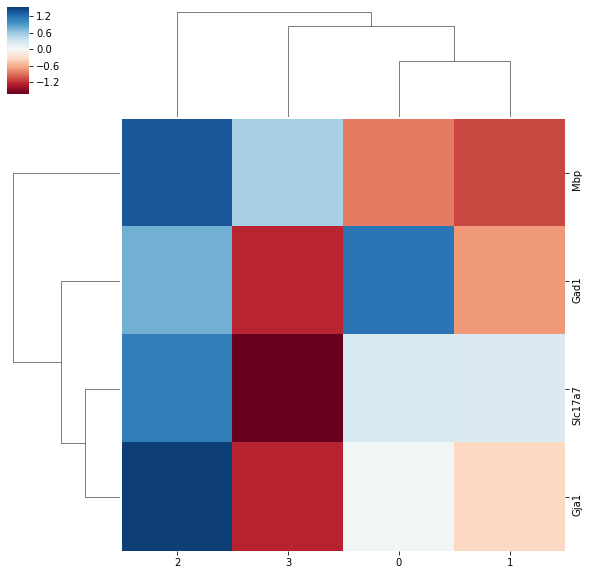

In [195]:
# cluster based on the top components
>>> from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters=4, random_state=0).fit(exp[['Gad1','Slc17a7','Gja1','Mbp']])

# average all genes according to these labels, then plot all the genes 
df = pd.concat([exp,pd.DataFrame(kmeans2.labels_)], axis = 1)
ff = df.groupby(0).mean()

from scipy import stats
fff=pd.DataFrame(stats.zscore(ff, axis = 0))
fff.columns = ff.columns
sns.clustermap(fff[['Gad1','Slc17a7','Gja1','Mbp']].transpose(), cmap="RdBu", center = 0)

In [77]:
# relative expression levels

s = exp.sum(axis=1)
exp2 = exp.loc[s != 0]
s = s[s!=0]
temp = exp2.div(s, axis=0) 

temp

Slc17a7       Mgp      Gad1       Nov   Rasgrf2      Rorb      Cux2  \
0                                                                         
0 -0.804385 -0.800086 -1.091542 -1.107999 -0.990935 -1.346221 -1.448912   
1  2.114379  1.703232  1.906865  2.336983  1.814351  2.491088  2.511739   
2  0.123688 -0.303664 -0.558026 -0.691229 -0.205141 -0.253930  1.312577   
3  0.986588  0.277988 -0.177840  0.070143  0.398929  0.148549 -1.092588   
4 -1.264804 -0.494383 -0.532181  0.104942 -0.275520 -0.242207 -0.831740   

     Plcxd2     Sulf2      Ctgf  ...      Reln       Fos      Egr1     Prok2  \
0                                ...                                           
0 -1.377391 -1.235691 -1.356648  ... -1.002809 -1.485877 -2.103412 -1.840542   
1  2.588579  1.959255  2.349807  ...  2.240802  2.551001  2.446533  2.470202   
2  0.221757 -0.391017 -1.049094  ... -0.458228  0.297989  0.416852 -0.422855   
3  0.109447  0.397717  0.692441  ...  0.115508  0.618832  0.981250  0.536927   
4 -1.017686  0.022578  0.548830  ... -0.345604 -1.308976 -1.372710 -0.344103   

       Egr2      Bdnf      Gja1      Ctss       Mbp      Flt1  
0                                                              
0 -2.276120 -1.605907 -1.102519 -1.431650 -1.201920 -1.594038  
1  2.938538  2.462043  1.625790  2.112379  1.423160  1.751192  
2 -0.279178 -0.198879 -0.402947 -0.812240 -1.213776 -1.332231  
3  0.511093  0.362978  0.214908  0.301195  0.499227  0.139808  
4 -0.667871 -0.679650  0.565621  0.369174  0.456019  1.609202  

[5 rows x 28 columns]

In [143]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(temp)
principalDf2 = pd.DataFrame(data = principalComponents)
sum(pca.explained_variance_ratio_)

0.6002878700820105

In [177]:
# cluster based on the top components
>>> from sklearn.cluster import KMeans
e2=pd.DataFrame(stats.zscore(exp, axis = 1))

kmeans2 = KMeans(n_clusters=6, random_state=0).fit(e2.dropna())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:2313: RuntimeWarning: invalid value encountered in true_divide
  np.expand_dims(sstd, axis=axis))


In [178]:
# average all genes according to these labels, then plot all the genes 
df = pd.concat([exp,pd.DataFrame(kmeans2.labels_)], axis = 1)
ff = df.groupby(0).mean()

<IPython.core.display.Javascript object>


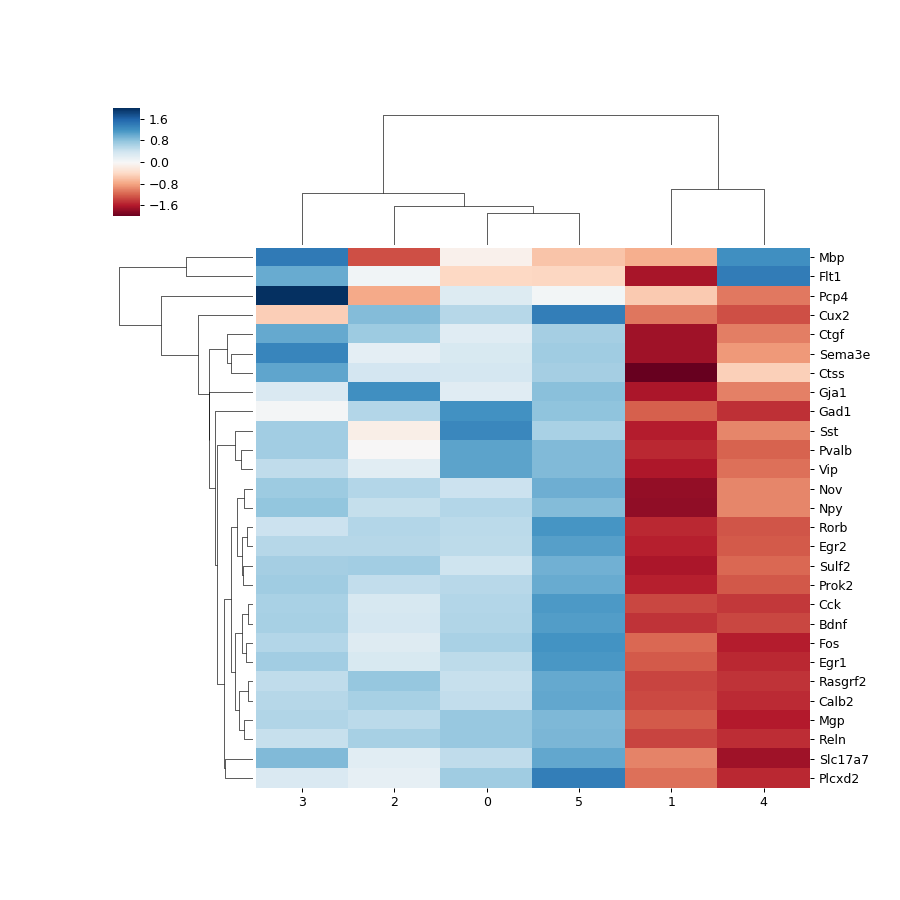

In [179]:
from scipy import stats
fff=pd.DataFrame(stats.zscore(ff, axis = 0))
fff.columns = ff.columns
sns.clustermap(fff.transpose(), cmap="RdBu", center = 0)

(array([220., 211., 232., 235., 249., 303., 318., 335., 336., 325., 367.,
        379., 378., 395., 383.,   0., 377., 383., 375., 375., 361., 370.,
        387., 379., 366., 384., 399., 401., 352., 409., 379.,   0., 336.,
        400., 376., 370., 373., 378., 377., 390., 392., 379., 398., 394.,
        383., 359.,   0., 363., 372., 364., 358., 387., 388., 366., 368.,
        375., 407., 382., 348., 347., 401., 362.,   0., 406., 375., 323.,
        384., 345., 375., 362., 388., 377., 388., 340., 405., 385., 400.,
        397.,   0., 414., 357., 359., 381., 367., 396., 390., 351., 374.,
        392., 394., 389., 422., 446., 507.]),
 array([ 6.        ,  6.93617021,  7.87234043,  8.80851064,  9.74468085,
        10.68085106, 11.61702128, 12.55319149, 13.4893617 , 14.42553191,
        15.36170213, 16.29787234, 17.23404255, 18.17021277, 19.10638298,
        20.04255319, 20.9787234 , 21.91489362, 22.85106383, 23.78723404,
        24.72340426, 25.65957447, 26.59574468, 27.53191489, 28.4680851

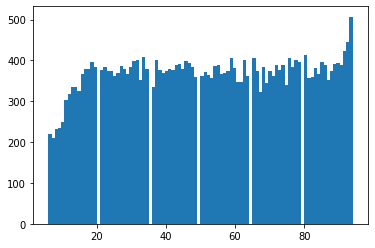

In [190]:
%matplotlib inline
plt.hist(coord[30], bins = 94)

In [189]:
coord[30]

0        15.0
1         8.0
2         6.0
3         7.0
4         6.0
5         8.0
6         9.0
7         8.0
8         7.0
9         6.0
10        6.0
11        9.0
12        7.0
13        8.0
14       12.0
15       12.0
16        6.0
17        6.0
18       16.0
19       12.0
20       12.0
21       10.0
22        7.0
23       10.0
24        6.0
25        7.0
26        7.0
27        6.0
28        6.0
29        8.0
         ... 
32815    94.0
32816    94.0
32817    94.0
32818    94.0
32819    94.0
32820    94.0
32821    94.0
32822    94.0
32823    94.0
32824    94.0
32825    94.0
32826    94.0
32827    94.0
32828    94.0
32829    94.0
32830    94.0
32831    94.0
32832    94.0
32833    94.0
32834    94.0
32835    94.0
32836    94.0
32837    94.0
32838    94.0
32839    94.0
32840    94.0
32841    94.0
32842    94.0
32843    94.0
32844    94.0
Name: 30, Length: 32845, dtype: float64

In [158]:
m = ff.mean(axis=0)
sd = ff.std(axis=0)
temp2 = ff.sub(m, axis=1) 
temp3 = temp2.div(sd, axis=1)


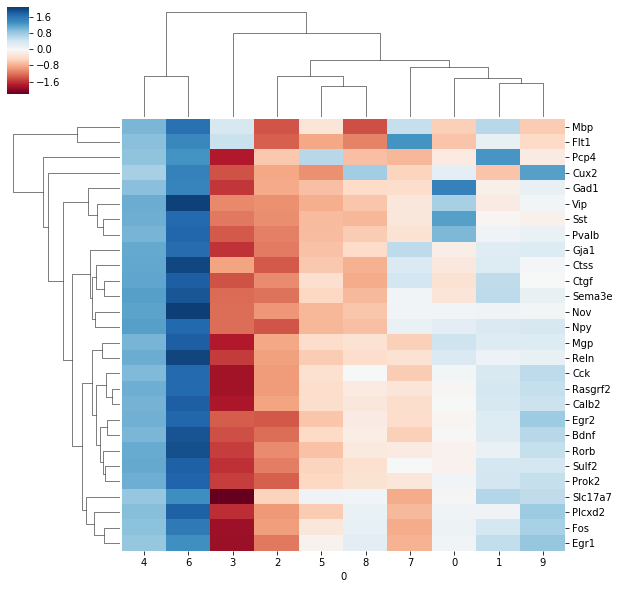

In [10]:
import seaborn as sns

sns.clustermap(temp3.transpose(), cmap="RdBu", center = 0)

In [ ]:
assign cell types based on relative or absolute levels of gene expression?

In [117]:
ax = plt.axes(projection='3d')
ax.scatter(coord[28], coord[29], coord[30], c=df[0], cmap='viridis', linewidth=0.5);


In [134]:
fff.sum(axis=0)

Slc17a7   -8.881784e-16
Mgp       -2.498002e-15
Gad1      -6.661338e-16
Nov        2.220446e-15
Rasgrf2    3.774758e-15
Rorb       7.299716e-15
Cux2      -7.771561e-16
Plcxd2     2.109424e-15
Sulf2     -2.636780e-15
Ctgf       3.358425e-15
Pcp4      -2.386980e-15
Sema3e    -2.081668e-15
Npy       -1.262879e-15
Sst       -1.262879e-15
Pvalb      1.165734e-15
Vip       -9.419548e-16
Calb2      4.163336e-15
Cck        4.996004e-16
Reln       1.942890e-16
Fos        2.109424e-15
Egr1       1.776357e-15
Prok2      2.220446e-16
Egr2       2.775558e-16
Bdnf      -1.609823e-15
Gja1      -7.965850e-15
Ctss       2.553513e-15
Mbp       -8.437695e-15
Flt1      -1.443290e-15
dtype: float64

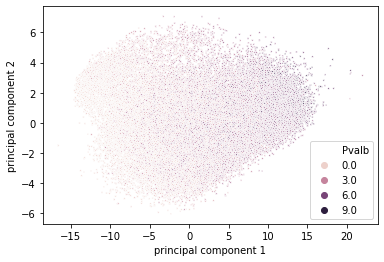

In [137]:
import seaborn as sns

fig, ax = plt.subplots()
out = pd.concat([principalDf, exp['Mbp']], axis = 1)
sns.scatterplot(data=out, x='principal component 1', y='principal component 2', hue=exp['Pvalb'], s = 3)


In [136]:
exp.columns

Index(['Slc17a7', 'Mgp', 'Gad1', 'Nov', 'Rasgrf2', 'Rorb', 'Cux2', 'Plcxd2',
       'Sulf2', 'Ctgf', 'Pcp4', 'Sema3e', 'Npy', 'Sst', 'Pvalb', 'Vip',
       'Calb2', 'Cck', 'Reln', 'Fos', 'Egr1', 'Prok2', 'Egr2', 'Bdnf', 'Gja1',
       'Ctss', 'Mbp', 'Flt1'],
      dtype='object', name='gene')

In [79]:
# for every astrocyte point want to return the minimum distance to a neuron 
#(ie compute all distances between a single astrocyte and all neurons)
#assign this distance to the feature matrix
exp2 = exp.loc[1:100,:]
exp2.loc[:,'dist'] = [ min([distance.euclidean(x,item) for item in np.array(neurons)]) for x in np.array(ast)]

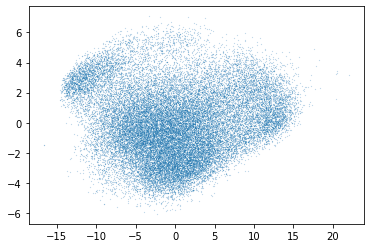

In [139]:
plot = plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], 0.01)


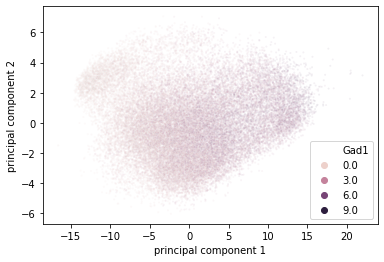

In [161]:
sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2',s = 4, alpha = 0.07, cmap = 'BuPu',hue = exp['Gad1'])


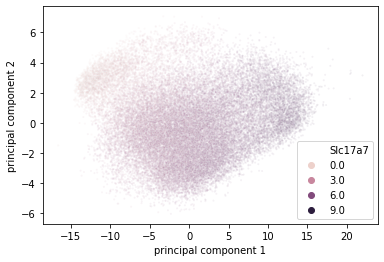

In [165]:
sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2',s = 4, alpha = 0.07, cmap = 'BuPu',hue = exp['Slc17a7'])


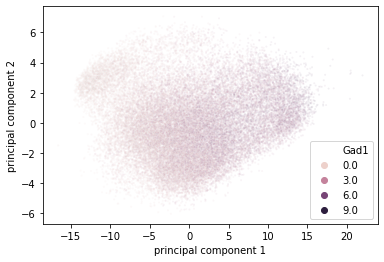

In [166]:
sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2',s = 4, alpha = 0.07, cmap = 'BuPu',hue = exp['Gad1'])


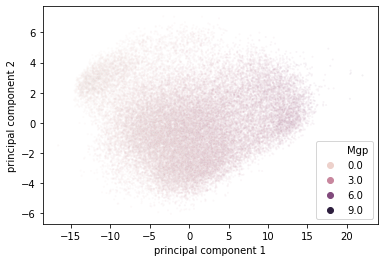

In [168]:
sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2',s = 4, alpha = 0.07, cmap = 'BuPu',hue = exp['Mgp'])


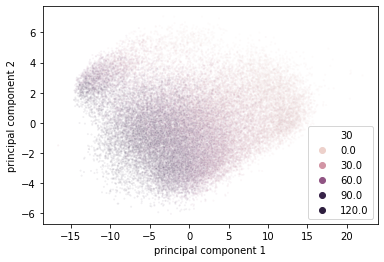

In [175]:
sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2',s = 4, alpha = 0.07, cmap = 'BuPu',hue = coord.loc[:,30])


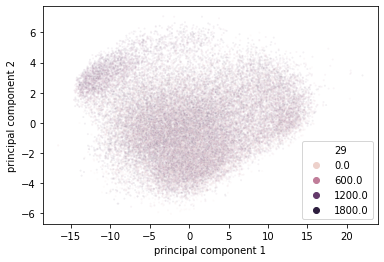

In [176]:
sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2',s = 4, alpha = 0.07, cmap = 'BuPu',hue = coord.loc[:,29])


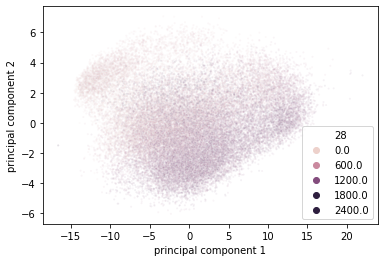

In [177]:
sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2',s = 4, alpha = 0.07, cmap = 'BuPu',hue = coord.loc[:,28])


In [ ]:
# major variable we might be capturing here is just the level along the z-axis 

# cluster based on relative gene expression instead

gene    Slc17a7       Mgp      Gad1       Nov   Rasgrf2      Rorb      Cux2  \
0      0.023792  0.013338  0.047146  0.035405  0.024078  0.041815  0.050537   
1      0.060492  0.023952  0.023707  0.042116  0.046316  0.034968  0.041593   
2      0.062508  0.039713  0.068803  0.032477  0.033794  0.028792  0.037709   
3      0.039836  0.013582  0.015229  0.057173  0.030133  0.043458  0.019249   
4      0.062801  0.025229  0.014979  0.042557  0.038609  0.037920  0.040773   
5      0.031427  0.015479  0.012360  0.021782  0.037155  0.051460  0.030647   
6      0.042346  0.027066  0.009884  0.009884  0.041041  0.042681  0.026416   
7      0.053888  0.021961  0.035090  0.045219  0.033008  0.043013  0.026478   
8      0.063406  0.018362  0.031536  0.008873  0.036010  0.028712  0.024096   
9      0.061728  0.023919  0.027848  0.032266  0.035828  0.031566  0.010476   
10     0.045230  0.015360  0.013173  0.045359  0.037252  0.034687  0.014613   
11     0.017261  0.011446  0.047647  0.024280  0.026386  0.044080  0.036597   
12     0.025388  0.017620  0.009878  0.053581  0.043034  0.044862  0.015215   
13     0.045830  0.026269  0.050376  0.046306  0.038004  0.035581  0.041850   
14     0.034702  0.012329  0.034730  0.025363  0.044074  0.049927  0.013248   
15     0.066493  0.021588  0.012961  0.010553  0.032888  0.035489  0.022508   
16     0.034196  0.010887  0.009903  0.047692  0.036357  0.050398  0.025025   
17     0.036903  0.008166  0.007750  0.035156  0.035944  0.049343  0.037457   
18     0.050634  0.010202  0.013075  0.050088  0.036779  0.024383  0.036561   
19     0.033775  0.010909  0.006105  0.042802  0.022360  0.047011  0.060781   
20     0.053997  0.023307  0.011437  0.043933  0.040306  0.031876  0.041295   
21     0.036911  0.027372  0.046260  0.016917  0.032054  0.039177  0.045226   
22     0.037309  0.011323  0.025465  0.042418  0.032516  0.037613  0.045560   
23     0.032206  0.017241  0.039448  0.044250  0.037077  0.047048  0.043276   
24     0.056851  0.023030  0.009891  0.031350  0.032279  0.032380  0.027274   
25     0.063907  0.025258  0.034052  0.041873  0.042999  0.044037  0.013876   
26     0.058631  0.022044  0.039539  0.048507  0.039454  0.050751  0.015808   
27     0.033577  0.012940  0.006264  0.065187  0.024735  0.052404  0.012548   
28     0.055575  0.024528  0.006377  0.059918  0.030209  0.033570  0.007842   
29     0.061790  0.025394  0.042985  0.041597  0.037511  0.037998  0.013281   
...         ...       ...       ...       ...       ...       ...       ...   
32815  0.097722  0.026732  0.028221  0.077326  0.049811  0.036407  0.095268   
32816  0.086963  0.033132  0.032225  0.016990  0.051669  0.037966  0.063892   
32817  0.089931  0.031921  0.067100  0.062075  0.033183  0.026908  0.038203   
32818  0.102798  0.035934  0.075679  0.070402  0.056687  0.036328  0.065774   
32819  0.092370  0.035809  0.033210  0.041424  0.062916  0.034956  0.074675   
32820  0.124879  0.035103  0.047007  0.021430  0.042361  0.025021  0.054757   
32821  0.115451  0.031335  0.024855  0.013913  0.056104  0.040857  0.110363   
32822  0.110855  0.037820  0.031012  0.016922  0.059794  0.034145  0.060961   
32823  0.130739  0.041966  0.026489  0.016032  0.061004  0.027677  0.076604   
32824  0.070840  0.030434  0.066299  0.044206  0.052742  0.032827  0.070035   
32825  0.124507  0.035855  0.031548  0.030430  0.052572  0.029115  0.097833   
32826  0.067608  0.030641  0.065296  0.022463  0.054047  0.029358  0.064016   
32827  0.061500  0.037633  0.052343  0.035961  0.068577  0.030582  0.034907   
32828  0.086541  0.035626  0.082078  0.022588  0.056248  0.031072  0.078197   
32829  0.079712  0.029041  0.030783  0.047325  0.050195  0.027671  0.048485   
32830  0.082473  0.025533  0.022503  0.018512  0.047379  0.058270  0.092547   
32831  0.097528  0.029138  0.031392  0.016451  0.081507  0.036369  0.091187   
32832  0.062760  0.027038  0.058178  0.038754  0.040616  0.023536  0.049901   
32833  0.089567  0.029710  0.047443  0.019402  0.0

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(temp)
principalDf2 = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2', 'PC3'])

In [45]:
df

Slc17a7       Mgp      Gad1       Nov   Rasgrf2      Rorb      Cux2  \
0      1.530122  0.857814  3.032047  2.276983  1.548486  2.689213  3.250150   
1      6.481122  2.566236  2.540028  4.512354  4.962341  3.746550  4.456316   
2      5.817238  3.695826  6.403076  3.022406  3.144985  2.679546  3.509390   
3      2.856534  0.973959  1.092025  4.099765  2.160770  3.116270  1.380273   
4      6.621325  2.659983  1.579268  4.486914  4.070681  3.998088  4.298854   
5      2.265657  1.115914  0.891074  1.570361  2.678643  3.709927  2.209444   
6      3.455496  2.208615  0.806519  0.806519  3.349014  3.482829  2.155604   
7      5.727181  2.333969  3.729316  4.805806  3.508062  4.571437  2.814097   
8      4.815519  1.394566  2.395068  0.673839  2.734874  2.180557  1.830044   
9      5.921619  2.294610  2.671447  3.095286  3.437020  3.028207  1.004933   
10     4.062035  1.379438  1.183069  4.073606  3.345559  3.115222  1.312408   
11     0.882145  0.584957  2.435052  1.240860  1.348515  2.252747  1.870348   
12     1.691843  1.174164  0.658262  3.570572  2.867742  2.989565  1.013931   
13     4.808554  2.756144  5.285481  4.858503  3.987406  3.733156  4.390925   
14     2.127433  0.755840  2.129128  1.554899  2.701944  3.060743  0.812164   
15     5.062408  1.643564  0.986748  0.803474  2.503913  2.701978  1.713668   
16     2.281423  0.726306  0.660697  3.181780  2.425597  3.362316  1.669531   
17     2.702803  0.598103  0.567633  2.574811  2.632587  3.613871  2.743330   
18     2.649877  0.533889  0.684294  2.621326  1.924791  1.276067  1.913398   
19     1.256747  0.405896  0.227152  1.592615  0.832006  1.749218  2.261580   
20     5.138188  2.217778  1.088345  4.180490  3.835341  3.033215  3.929489   
21     3.929171  2.913723  4.924406  1.800880  3.412131  4.170410  4.814333   
22     2.858790  0.867648  1.951206  3.250214  2.491503  2.882057  3.490986   
23     2.607016  1.395594  3.193260  3.581930  3.001314  3.808462  3.503115   
24     6.114148  2.476796  1.063688  3.371530  3.471461  3.482340  2.933173   
25     5.693516  2.250201  3.033718  3.730454  3.830804  3.923288  1.236170   
26     5.297274  1.991672  3.572342  4.382584  3.564713  4.585334  1.428253   
27     1.754570  0.676167  0.327326  3.406392  1.292537  2.738406  0.655712   
28     2.993149  1.321023  0.343471  3.227068  1.626988  1.808027  0.422340   
29     5.377111  2.209881  3.740682  3.619889  3.264294  3.306664  1.155774   
...         ...       ...       ...       ...       ...       ...       ...   
32815  4.100260  1.121629  1.184087  3.244464  2.089970  1.527581  3.997298   
32816  5.431070  2.069196  2.012556  1.061082  3.226847  2.371094  3.990201   
32817  4.321209  1.533812  3.224197  2.982705  1.594452  1.292926  1.835665   
32818  4.500462  1.573160  3.313218  3.082178  2.481754  1.590410  2.879585   
32819  4.969684  1.926578  1.786743  2.228719  3.384996  1.880682  4.017675   
32820  4.537484  1.275463  1.707990  0.778669  1.539169  0.909122  1.989585   
32821  4.272189  1.159540  0.919731  0.514842  2.076099  1.511872  4.083896   
32822  4.615444  1.574640  1.291195  0.704554  2.489505  1.421640  2.538126   
32823  5.146329  1.651914  1.042689  0.631065  2.401336  1.089456  3.015373   
32824  4.568636  1.962768  4.275784  2.850963  3.401436  2.117057  4.516698   
32825  4.488892  1.292700  1.137419  1.097091  1.895373  1.049688  3.527206   
32826  3.529747  1.599726  3.409052  1.172798  2.821778  1.532746  3.342247   
32827  2.981577  1.824500  2.537640  1.743420  3.324705  1.482640  1.692329   
32828  4.331504  1.783149  4.108093  1.130564  2.815274  1.555193  3.913868   
32829  4.349186  1.584496  1.679546  2.582098  2.738721  1.509754  2.645421   
32830  4.393940  1.360322  1.198883  0.986242  2.524235  3.104454  4.930626   
32831  4.368561  1.305171  1.406147  0.736894  3.650946  1.629064  4.084533   
32832  4.237424  1.825557  3.928037  2.616586  2.742303  1.589116  3.369181   
32833  4.252233  1.410496  2.252369  0.921124  2.427156  1

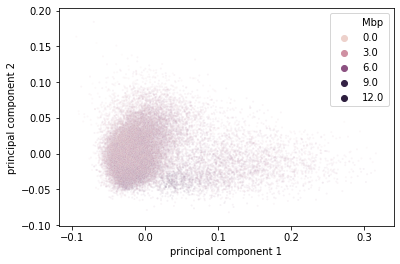

In [205]:
sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2',s = 4, alpha = 0.07, cmap = 'BuPu',hue = )


<IPython.core.display.Javascript object>


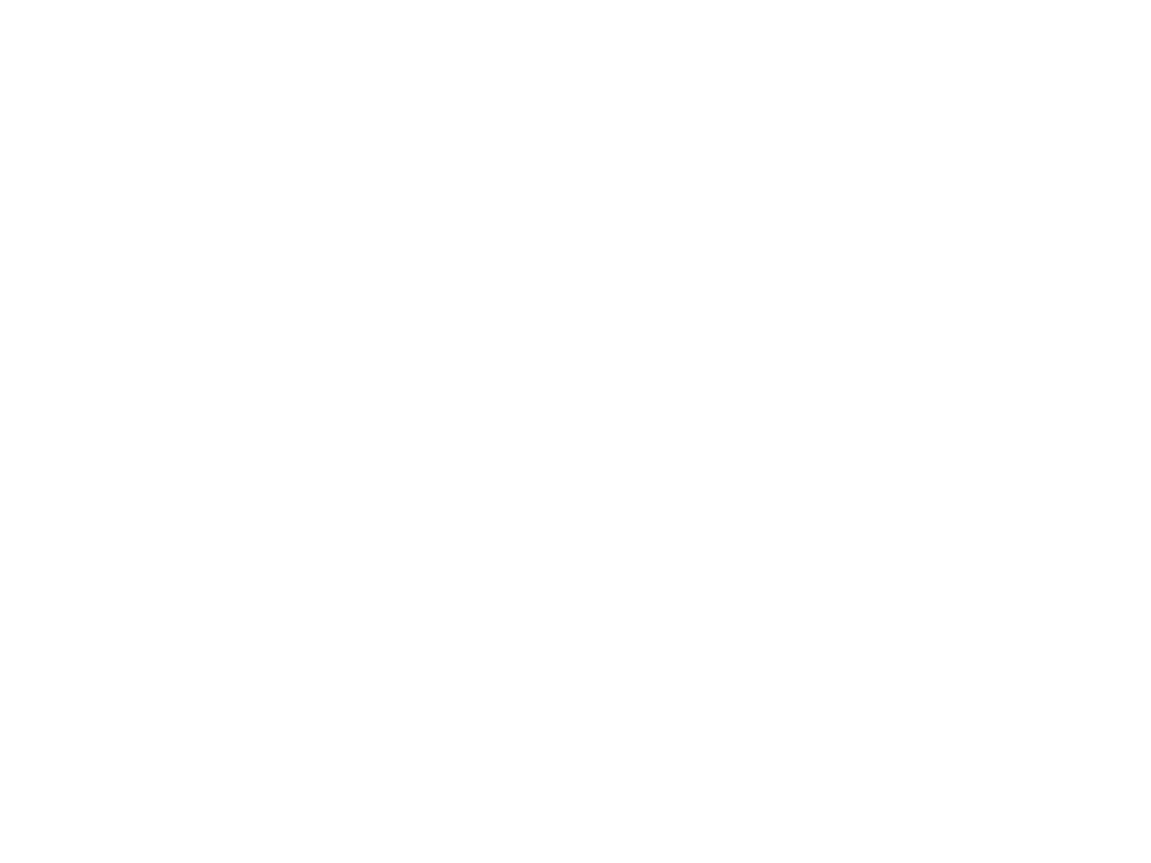

KeyError: 'PC1'

In [11]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook


ax = plt.axes(projection='3d')
ax.scatter(principalDf['PC1'], principalDf['PC2'], principalDf['PC3'], c=exp['Gad1'], cmap='viridis', linewidth=0.5, s = 0.5)


<IPython.core.display.Javascript object>


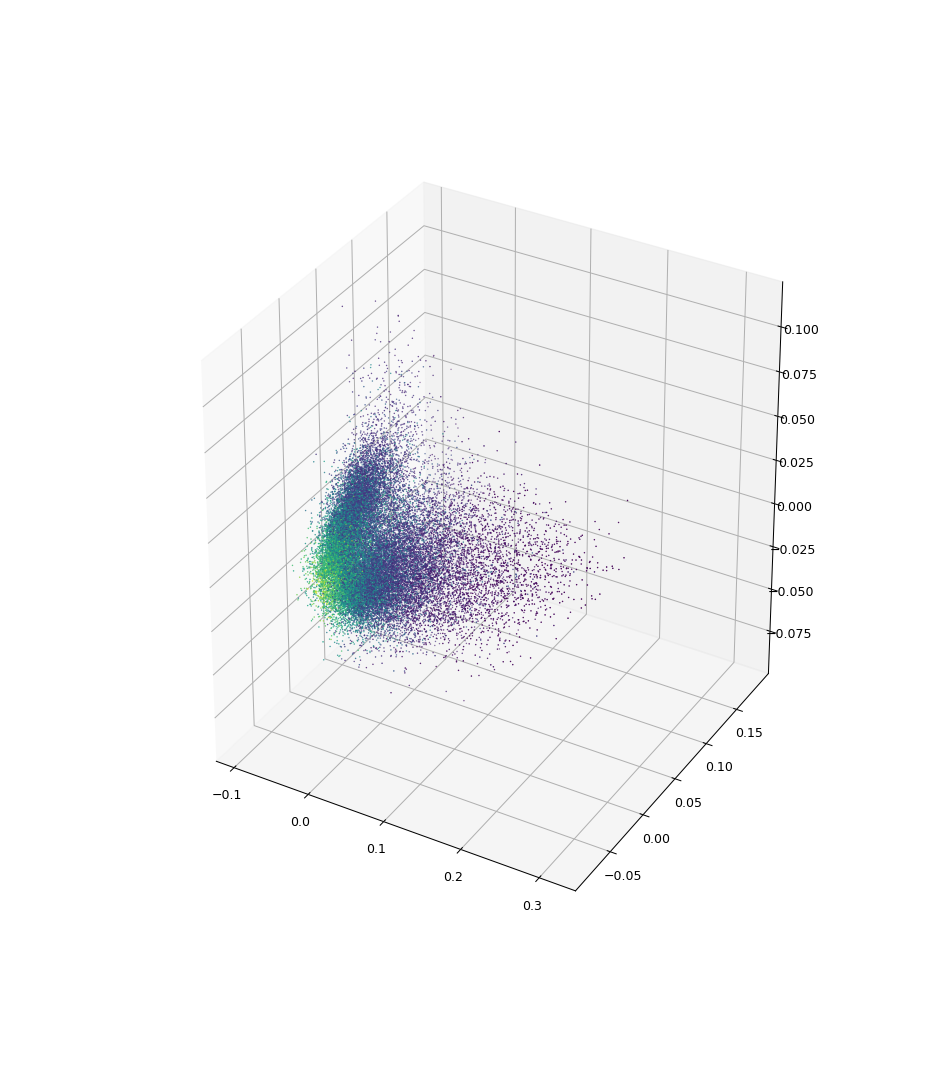

In [22]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook


ax = plt.axes(projection='3d')
ax.scatter(principalDf2['PC1'], principalDf2['PC2'], principalDf2['PC3'], c=exp2['Gad1'], cmap='viridis', linewidth=0.5, s = 0.5)


(array([3116., 8754., 5887., 4155., 3885., 3603., 2083.,  943.,  375.,
          44.]),
 array([0.        , 0.8438667 , 1.68773341, 2.53160011, 3.37546682,
        4.21933352, 5.06320023, 5.90706693, 6.75093364, 7.59480034,
        8.43866704]),
 <a list of 10 Patch objects>)

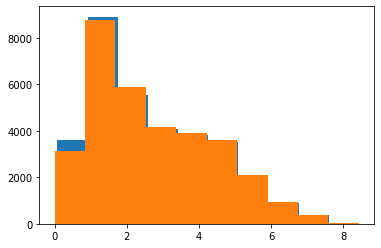

In [19]:
%matplotlib inline

plt.hist(exp2['Gad1'])
plt.hist(exp['Gad1'])